### Notebook and Data Setup

In [2]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import csv data
mouse_drug_data = pd.read_csv('data/mouse_drug_data.csv')
clinical_trial_data = pd.read_csv('data/clinicaltrial_data.csv')

#Create dataframes
df_mouse = pd.DataFrame(mouse_drug_data)
df_trials = pd.DataFrame(clinical_trial_data)

In [4]:
df_mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
df_trials.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [17]:
#Merge mouse drug and clinical trials into a single dataset

df_mouse_trials = df_trials.merge(df_mouse, on='Mouse ID', how='outer')
df_mouse_trials.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [7]:
#Check for clean dataset
df_mouse_trials.rename(columns={'Tumor Volume (mm3)':'Tumor_Volume_mm3'}, inplace=True)
df_mouse_trials.dropna().count()

Mouse ID            1906
Timepoint           1906
Tumor_Volume_mm3    1906
Metastatic Sites    1906
Drug                1906
dtype: int64

### Tumor Response to Treatment

In [8]:
#Create table for tumor response with needed columns
tumor = df_mouse_trials[['Drug', 'Timepoint', 'Tumor_Volume_mm3']]


#Create groupby grouped by Drug and Timepoint
tumor_group = tumor.groupby(['Drug', 'Timepoint'])
tumor_group.head()

,Drug,Timepoint,Tumor_Volume_mm3
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552
...,...,...,...
1721,Capomulin,35,39.847576
1722,Capomulin,40,38.255627
1723,Capomulin,45,38.939633
1732,Capomulin,40,28.167397


In [9]:
#Calculate mean tumor volume

tumor_volume_mean = tumor_group.mean().reset_index()
tumor_volume_mean.head(10)

,Drug,Timepoint,Tumor_Volume_mm3
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [10]:
#Calculate standard error of tumor volume

tumor_volume_sem = tumor_group.sem().reset_index()
tumor_volume_sem.head(10)

,Drug,Timepoint,Tumor_Volume_mm3
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [11]:
#Reformatting tumor_volume_mean

tumor_volume_mean.pivot(index='Timepoint', columns='Drug', values='Tumor_Volume_mm3')

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
#Prepping scatterplot data
tumor_x = tumor_volume_mean.Timepoint
tumor_y = tumor_volume_mean.Tumor_Volume_mm3
tumor_error = tumor_volume_sem.Tumor_Volume_mm3

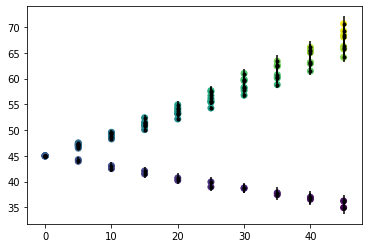

In [13]:
#Scatter Plot error bar
plt.errorbar(tumor_x, tumor_y, yerr=tumor_error,fmt = '.k')

#Scatter Plot data
plt.scatter(tumor_x,tumor_y, c=tumor_y, cmap='viridis')

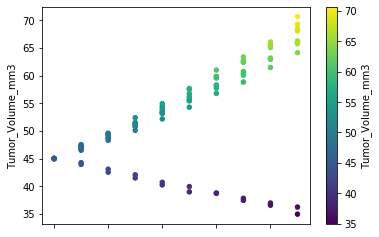

In [14]:
#Scatter plot formatting
tumor_volume_mean.plot.scatter(x='Timepoint',
                                            y='Tumor_Volume_mm3',
                                            c='Tumor_Volume_mm3',
                                            colormap='viridis')
